## Packages

In [ ]:
# Importing Common Packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# Importing LSTM Packages
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, BatchNormalization, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
# Importing Random Forest Packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Importing SVR Packages
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR

In [ ]:
# Importing SARIMA Package
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [ ]:
# Importing XGBoost Regressor Package
import xgboost as xgb

## Dataset

### Importing Data

In [ ]:
df = pd.read_csv('Turbine_Data.csv', parse_dates=['Unnamed: 0'],index_col=['Unnamed: 0'])

In [ ]:
df.index = pd.to_datetime(df.index)

### Dataframe

In [ ]:
df

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,1029.870744,...,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445
2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,1030.160478,...,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231
2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,1030.137822,...,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839
2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,1030.178178,...,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118224 entries, 2017-12-31 00:00:00+00:00 to 2020-03-30 23:50:00+00:00
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ActivePower                   94750 non-null   float64
 1   AmbientTemperatue             93817 non-null   float64
 2   BearingShaftTemperature       62518 non-null   float64
 3   Blade1PitchAngle              41996 non-null   float64
 4   Blade2PitchAngle              41891 non-null   float64
 5   Blade3PitchAngle              41891 non-null   float64
 6   ControlBoxTemperature         62160 non-null   float64
 7   GearboxBearingTemperature     62540 non-null   float64
 8   GearboxOilTemperature         62438 non-null   float64
 9   GeneratorRPM                  62295 non-null   float64
 10  GeneratorWinding1Temperature  62427 non-null   float64
 11  GeneratorWinding2Temperature  62449 non-null   float64
 12

In [ ]:
df.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


### Cleaning and Preprocessing Dataset

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.drop(columns=['WTG', 'ControlBoxTemperature'], inplace=True)

In [ ]:
df.isna().sum()

ActivePower                       561
AmbientTemperatue                1487
BearingShaftTemperature         32805
Blade1PitchAngle                53198
Blade2PitchAngle                53303
Blade3PitchAngle                53303
GearboxBearingTemperature       32783
GearboxOilTemperature           32755
GeneratorRPM                    32898
GeneratorWinding1Temperature    32766
GeneratorWinding2Temperature    32744
HubTemperature                  32917
MainBoxTemperature              32816
NacellePosition                 23077
ReactivePower                     563
RotorRPM                        33066
TurbineStatus                   32426
WindDirection                   23077
WindSpeed                         716
dtype: int64

In [ ]:
df = df[df['ActivePower'] >= 0]

In [ ]:
df.dropna(subset=['ActivePower'], inplace=True)

<ipython-input-16-984376c678c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['ActivePower'], inplace=True)


### Checking Percentage of Missing Values

In [ ]:
missing_percentage = df['ActivePower'].isna().sum() / len(df['ActivePower']) * 100
print(f'Percentage of missing values: {missing_percentage:.2f}%')

Percentage of missing values: 0.00%


### Correlation Heatmap

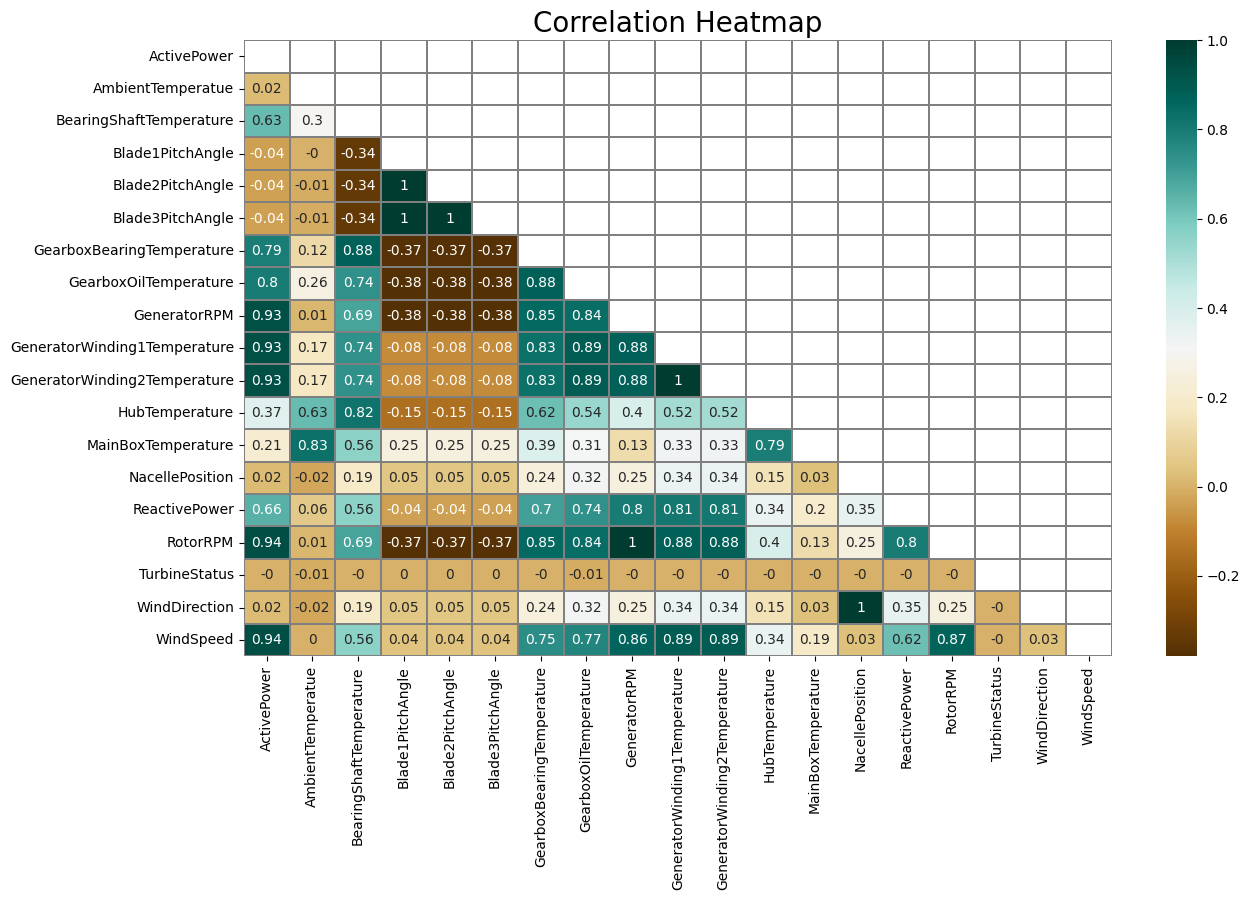

In [ ]:
corr_matrix = df.corr().round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.subplots(figsize=(14,8))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap="BrBG", linewidths=0.1, linecolor='gray')
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Selecting Relevant Columns and Resampling

In [ ]:
df = df[['ActivePower', 'WindSpeed']].dropna()

In [ ]:
df_daily = df.resample('D').mean().dropna()

In [ ]:
len(df_daily)

748

## LSTM

### Split Data into Train and Test Sets

In [ ]:
train_data, test_data = df_daily['ActivePower'][:698], df_daily['ActivePower'][698:748]

train_data.shape, test_data.shape

((698,), (50,))

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_scaled = scaler.transform(test_data.values.reshape(-1, 1))

### Split Data into Sequences

In [ ]:
def split_sequences(data, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(data):
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
n_steps_in, n_steps_out = 35, 15

X_train, y_train = split_sequences(train_scaled, n_steps_in, n_steps_out)
X_test, y_test = split_sequences(test_scaled, n_steps_in, n_steps_out)

### Reshaping Data for LSTM

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], 1))

### Building and Training LSTM Model

In [ ]:
lstm_model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(n_steps_in, 1)),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    BatchNormalization(),
    Dense(n_steps_out)
])

In [ ]:
lstm_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

In [ ]:
history = lstm_model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test), shuffle=False, callbacks=[early_stopping], verbose=0)

Epoch 162: early stopping


### Making Predictions with LSTM Model

In [ ]:
predictions = lstm_model.predict(X_test, verbose=0)

predictions = scaler.inverse_transform(predictions)

In [ ]:
predictions[0][0:15]

array([654.61993, 647.8695 , 630.36743, 643.132  , 648.2854 , 640.8672 ,
       622.27295, 681.22577, 668.66876, 645.15643, 689.34576, 701.1295 ,
       665.02167, 696.9709 , 699.68054], dtype=float32)

### Evaluating LSTM Model

In [ ]:
df_lstm = pd.DataFrame({'ActualPower': df_daily['ActivePower'][733:748], 'PredictedPower': predictions[0][0:15]}, index=df_daily[733:748].index)

In [ ]:
r2_lstm = r2_score(df_lstm["ActualPower"], df_lstm["PredictedPower"])
mae_lstm = mean_absolute_error(df_lstm["ActualPower"], df_lstm["PredictedPower"])
rmse_lstm = mean_squared_error(df_lstm["ActualPower"], df_lstm["PredictedPower"], squared=False)
mape_lstm = mean_absolute_percentage_error(df_lstm["ActualPower"], df_lstm["PredictedPower"])

In [ ]:
print('LSTM Model Evaluation:')
print(f'R-squared: {r2_lstm:.2f}')
print(f'MAE: {mae_lstm:.2f}')
print(f'RMSE: {rmse_lstm:.2f}')
print(f'MAPE: {mape_lstm:.2f}')

LSTM Model Evaluation:
R-squared: 0.13
MAE: 139.06
RMSE: 160.79
MAPE: 0.25


### Plotting LSTM Predictions

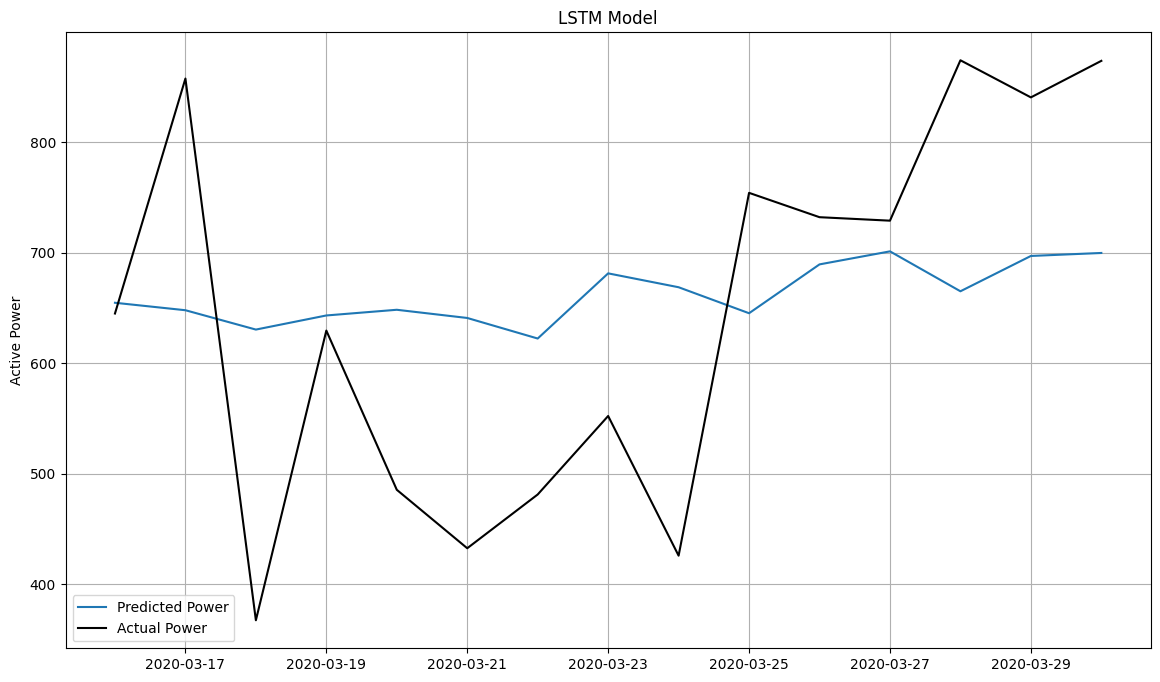

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(df_lstm['PredictedPower'], label='Predicted Power')
plt.plot(df_lstm['ActualPower'], color='black', label='Actual Power')
plt.ylabel('Active Power')
plt.legend()
plt.grid()
plt.title("LSTM Model")
plt.show()

## Random Forest

### Splitting Data into Train and Test Sets

In [ ]:
X_train_rf, X_test_rf = df_daily[['WindSpeed']][:733], df_daily[['WindSpeed']][733:748]
y_train_rf, y_test_rf = df_daily['ActivePower'][:733], df_daily['ActivePower'][733:748]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((649, 35, 1), (1, 35, 1), (649, 15, 1), (1, 15, 1))

### Building and Training RF Model

In [ ]:
rf_model = RandomForestRegressor(n_estimators=1000)

In [ ]:
rf_model.fit(X_train_rf, y_train_rf)

RandomForestRegressor(n_estimators=1000)

### Making Predictions with RF Model

In [ ]:
rf_predictions = rf_model.predict(X_test_rf)

### Evaluating RF Model

In [ ]:
df_rf = pd.DataFrame({'ActualPower': y_test_rf, 'PredictedPower': rf_predictions}, index=y_test_rf.index)

In [ ]:
r2_rf = r2_score(df_rf["ActualPower"], df_rf["PredictedPower"])
mae_rf = mean_absolute_error(df_rf["ActualPower"], df_rf["PredictedPower"])
rmse_rf = mean_squared_error(df_rf["ActualPower"], df_rf["PredictedPower"], squared=False)
mape_rf = mean_absolute_percentage_error(df_rf["ActualPower"], df_rf["PredictedPower"])

In [ ]:
print('Random Forest Model Evaluation:')
print(f'R-squared: {r2_rf:.3f}')
print(f'MAE: {mae_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'MAPE: {mape_rf:.3f}')

Random Forest Model Evaluation:
R-squared: 0.911
MAE: 40.73
RMSE: 51.34
MAPE: 0.064


### Plotting RF Predictions

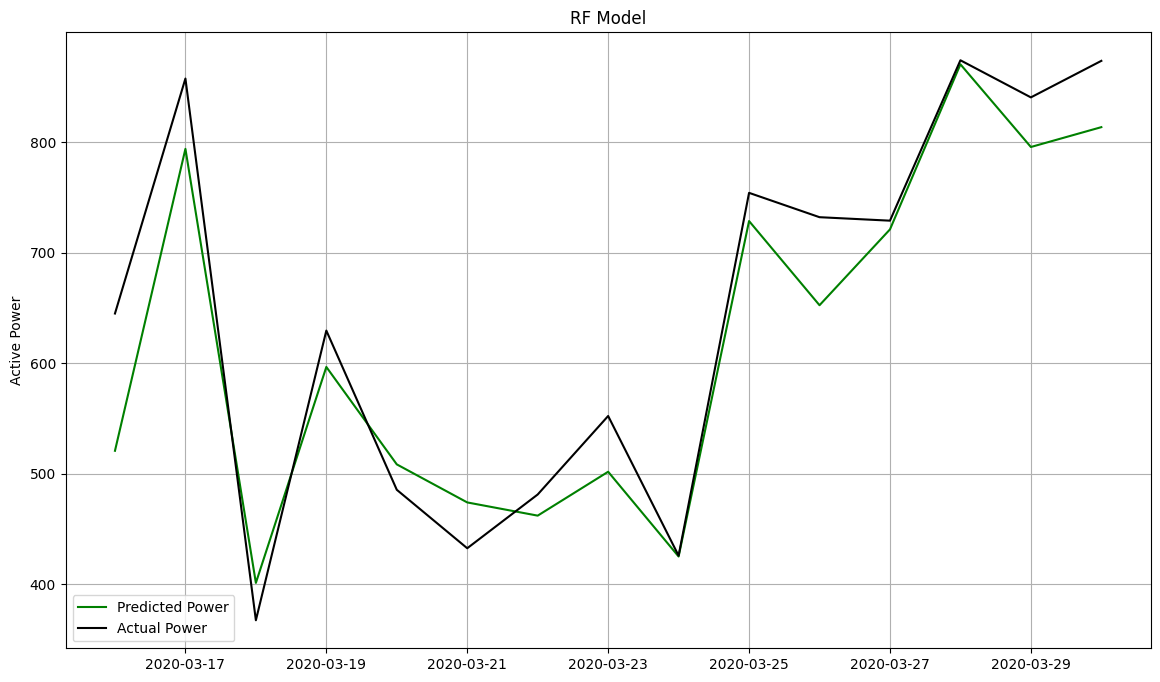

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(df_rf['PredictedPower'], color='green', label='Predicted Power')
plt.plot(df_rf['ActualPower'], color='black', label='Actual Power')
plt.ylabel('Active Power')
plt.legend()
plt.grid()
plt.title("RF Model")
plt.show()

## SVR

### Splitting Data into Train and Test Sets

In [ ]:
X_train_svr, X_test_svr = df_daily[['WindSpeed']][:733], df_daily[['WindSpeed']][733:748]
y_train_svr, y_test_svr = df_daily['ActivePower'][:733], df_daily['ActivePower'][733:748]

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [ ]:
X_train_svr_scaled = scaler_X.fit_transform(X_train_svr)
y_train_svr_scaled = scaler_y.fit_transform(y_train_svr.values.reshape(-1, 1))
X_test_svr_scaled = scaler_X.transform(X_test_svr)

### Building and Training SVR Model

In [ ]:
svr_model = LinearSVR()
svr_model.fit(X_train_svr_scaled, y_train_svr_scaled.ravel())

LinearSVR()

### Making Predictions with SVR Model

In [ ]:
svr_predictions_scaled = svr_model.predict(X_test_svr_scaled)
svr_predictions = scaler_y.inverse_transform(svr_predictions_scaled.reshape(-1, 1))

### Evaluating SVR Model

In [ ]:
df_svr = pd.DataFrame({'ActualPower': y_test_svr.values.flatten(), 'PredictedPower': svr_predictions.flatten()}, index=y_test_svr.index)

In [ ]:
r2_svr = r2_score(df_svr["ActualPower"], df_svr["PredictedPower"])
mae_svr = mean_absolute_error(df_svr["ActualPower"], df_svr["PredictedPower"])
rmse_svr = mean_squared_error(df_svr["ActualPower"], df_svr["PredictedPower"], squared=False)
mape_svr = mean_absolute_percentage_error(df_svr["ActualPower"], df_svr["PredictedPower"])

In [ ]:
print('SVR Model Evaluation:')
print(f'R-squared: {r2_svr:.3f}')
print(f'MAE: {mae_svr:.2f}')
print(f'RMSE: {rmse_svr:.2f}')
print(f'MAPE: {mape_svr:.3f}')

SVR Model Evaluation:
R-squared: 0.894
MAE: 47.54
RMSE: 56.09
MAPE: 0.067


### Plotting SVR Predictions

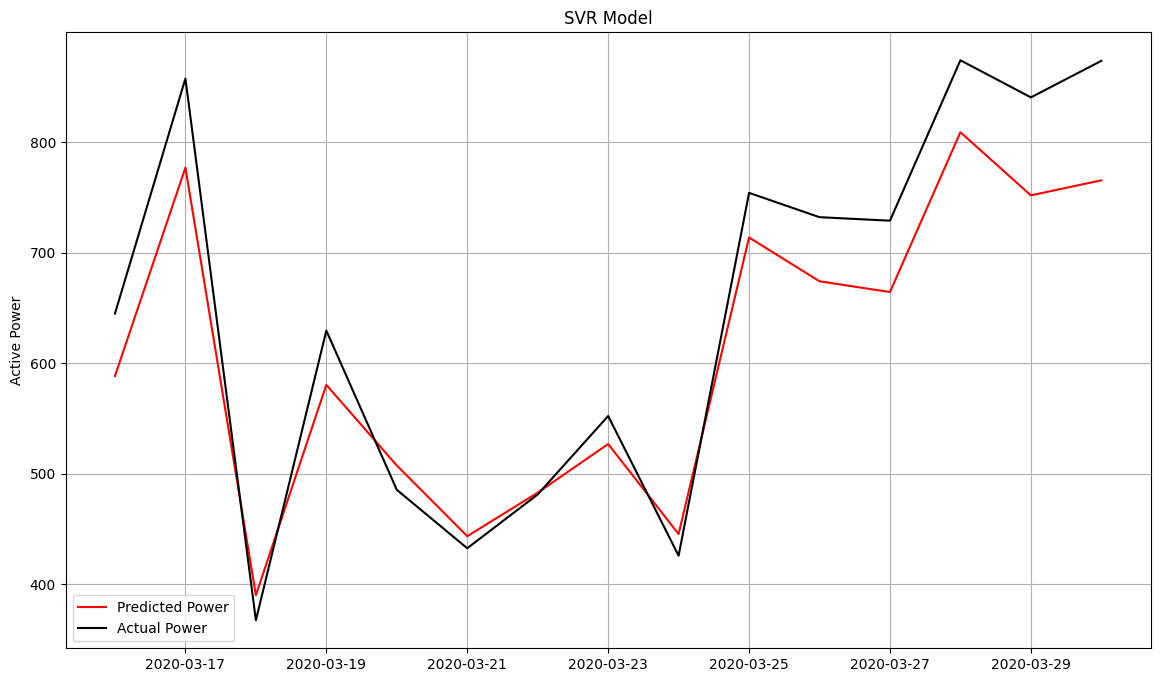

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(df_svr['PredictedPower'], color='red', label='Predicted Power')
plt.plot(df_svr['ActualPower'], color='black', label='Actual Power')
plt.ylabel('Active Power')
plt.legend()
plt.grid()
plt.title("SVR Model")
plt.show()

## SARIMA

### Seasonal Nature of Data

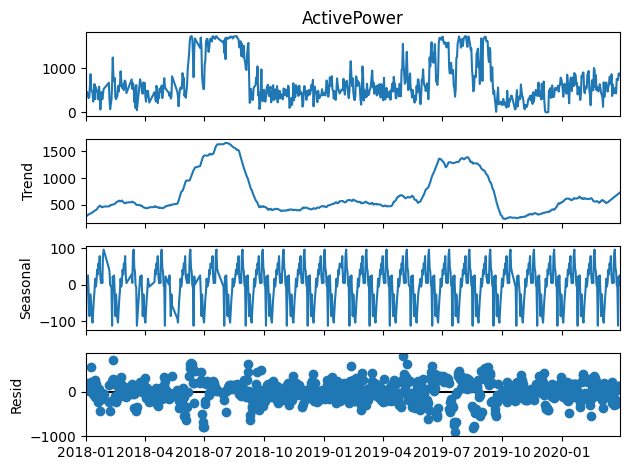

<Figure size 1400x800 with 0 Axes>

In [ ]:
result = seasonal_decompose(df_daily['ActivePower'].dropna(), period=31, model='additive', extrapolate_trend=True)
result.plot()
plt.figure(figsize=(14, 8))
plt.show()

### Splitting Data into Train and Test Sets

In [ ]:
train_data_sarima, test_data_sarima = df_daily[0:733], df_daily[733:748]

### Building and Training SARIMA Model

In [ ]:
sarima_model = pm.auto_arima(train_data_sarima['ActivePower'],start_p=0,d=0,start_q=0, max_p=15,max_q=5, start_P=0,D=0, start_Q=0, max_P=8, max_Q=8, m=12, seasonal=True, stationary=True, error_action='warn',trace=True, supress_warnings=True,stepwise=True, random_state=20,n_fits=100)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=11058.957, Time=0.22 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=9980.519, Time=2.30 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=10426.421, Time=2.31 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=11931.508, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=9982.664, Time=0.17 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=9979.185, Time=3.98 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=9977.965, Time=22.62 sec
 ARIMA(1,0,0)(4,0,0)[12] intercept   : AIC=9979.590, Time=47.65 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=9979.889, Time=9.60 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=9978.776, Time=7.96 sec
 ARIMA(1,0,0)(4,0,1)[12] intercept   : AIC=9981.405, Time=18.79 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=10745.162, Time=18.19 sec
 ARIMA(2,0,0)(3,0,0)[12] intercept   : AIC=9966.386, Time=15.23 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=9967.048, Time=4.21 sec
 ARIMA(2,0

NameError: name 'model' is not defined

In [ ]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  733
Model:             SARIMAX(6, 0, 0)x(3, 0, 0, 12)   Log Likelihood               -4965.349
Date:                            Sun, 19 May 2024   AIC                           9952.697
Time:                                    08:50:28   BIC                          10003.266
Sample:                                         0   HQIC                          9972.203
                                            - 733                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     50.3115     17.709      2.841      0.004      15.603      85.020
ar.L1          0.7066      0.032     22.079      0.000       0.644       0.769
ar.L2          0.0611      0.037      1.638      0.102      -0.012       0.134
ar.L3          0.0073      0.043      0.172      0.863      -0.076       0.091
ar.L4          0.0536      0.045      1.198      0.231      -0.034       0.141
ar.L5          0.0078      0.044      0.179      0.858      -0.078       0.094
ar.L6          0.0806      0.037      2.184      0.029       0.008       0.153
ar.S.L12       0.0259      0.034      0.759      0.448      -0.041       0.093
ar.S.L24       0.0360      0.039      0.930      0.352      -0.040       0.112
ar.S.L36       0.0564      0.038      1.492      0.136      -0.018       0.131
sigma2      4.526e+04   2136.856     21.179      0.000    4.11e+04    4.94e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                24.65
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.14
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
p = 6
d = 0
q = 0
P = 3
D = 0
Q = 0
m = 12

sarima_model = SARIMAX(train_data_sarima['ActivePower'], order=(p,d,q), seasonal_order=(P,D,Q,m), dynamic=True)
sarima_model_fit = sarima_model.fit(disp=0)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['dynamic']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


### Making Predictions with SARIMA Model

In [ ]:
sarima_predictions = sarima_model_fit.predict(start=1, end=len(test_data_sarima['ActivePower']))

sarima_predictions.index = test_data_sarima.index

### Evaluating SARIMA Model

In [ ]:
df_sarima = pd.DataFrame({'ActualPower': test_data_sarima['ActivePower'], 'PredictedPower': sarima_predictions}, index=test_data_sarima.index)

In [ ]:
sarima_r2 = r2_score(df_sarima['ActualPower'], df_sarima['PredictedPower'])
sarima_mae = mean_absolute_error(df_sarima['ActualPower'], df_sarima['PredictedPower'])
sarima_rmse = mean_squared_error(df_sarima['ActualPower'], df_sarima['PredictedPower'], squared=False)
sarima_mape = mean_absolute_percentage_error(df_sarima['ActualPower'], df_sarima['PredictedPower'])

In [ ]:
print('SARIMA Model Evaluation:')
print(f'R-squared: {sarima_r2:.3f}')
print(f'MAE: {sarima_mae:.2f}')
print(f'RMSE: {sarima_rmse:.2f}')
print(f'MAPE: {sarima_mape:.3f}')

SARIMA Model Evaluation:
R-squared: -1.893
MAE: 255.06
RMSE: 293.27
MAPE: 0.368


### Plotting SARIMA Predictions

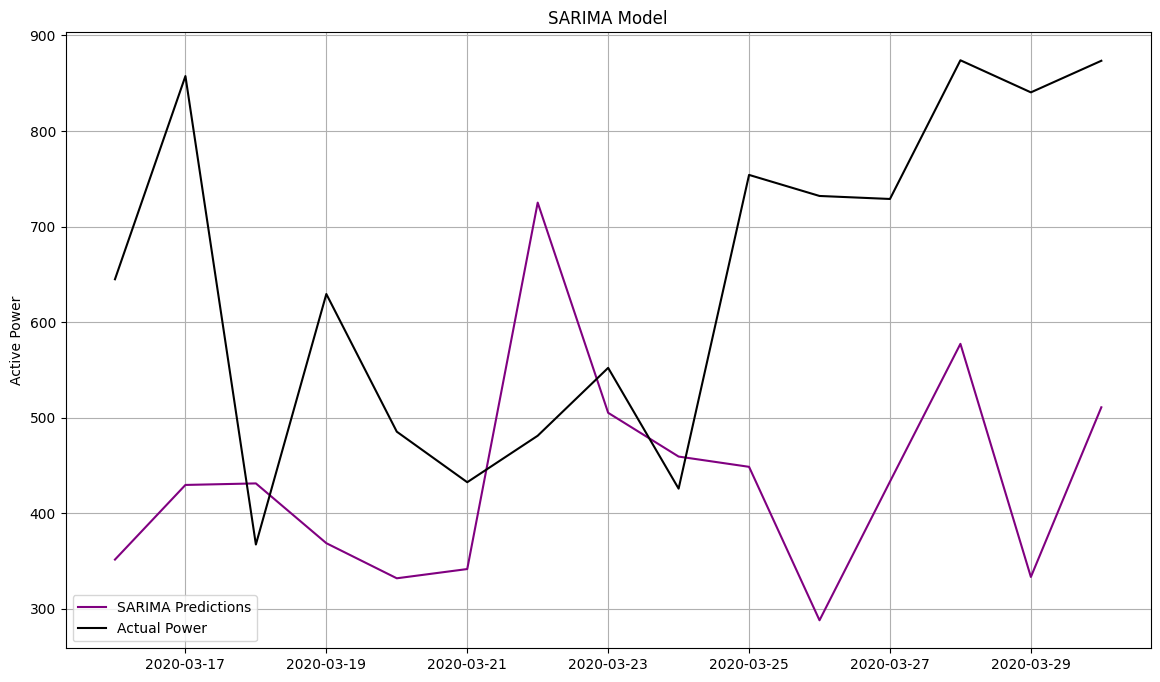

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(df_sarima.index, df_sarima['PredictedPower'], color='purple', label='SARIMA Predictions')
plt.plot(df_sarima.index, df_sarima['ActualPower'], color='black', label='Actual Power')
plt.ylabel('Active Power')
plt.legend()
plt.grid()
plt.title("SARIMA Model")
plt.show()

## XGB Regressor

### Splitting Data into Train and Test Sets

In [ ]:
X_train_xgb, X_test_xgb = df_daily[['WindSpeed']][:733], df_daily[['WindSpeed']][733:748]
y_train_xgb, y_test_xgb = df_daily['ActivePower'][0:733],  df_daily['ActivePower'][733:748]

### Building and Training XGB Regressor Model

In [ ]:
xgb_model = xgb.XGBRegressor(n_estimators=1000)
xgb_model.fit(X_train_xgb, y_train_xgb, eval_set=[(X_train_xgb, y_train_xgb), (X_test_xgb, y_test_xgb)], early_stopping_rounds=50, verbose=False)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Making Predictions with XGB Regressor Model

In [ ]:
xgb_predictions = xgb_model.predict(X_test_xgb)

### Evaluating XGB Regressor Model

In [ ]:
df_xgb = pd.DataFrame({'ActualPower': y_test_xgb, 'PredictedPower': xgb_predictions}, index=y_test_xgb.index)

In [ ]:
xgb_r2 = r2_score(df_xgb['ActualPower'], df_xgb['PredictedPower'])
xgb_mae = mean_absolute_error(df_xgb['ActualPower'], df_xgb['PredictedPower'])
xgb_rmse = mean_squared_error(df_xgb['ActualPower'], df_xgb['PredictedPower'], squared=False)
xgb_mape = mean_absolute_percentage_error(df_xgb['ActualPower'], df_xgb['PredictedPower'])

In [ ]:
print('XGBoost Model Evaluation:')
print(f'R-squared: {xgb_r2:.3f}')
print(f'MAE: {xgb_mae:.2f}')
print(f'RMSE: {xgb_rmse:.2f}')
print(f'MAPE: {xgb_mape:.3f}')

XGBoost Model Evaluation:
R-squared: 0.891
MAE: 48.61
RMSE: 56.97
MAPE: 0.072


### Plotting XGBoost Predictions

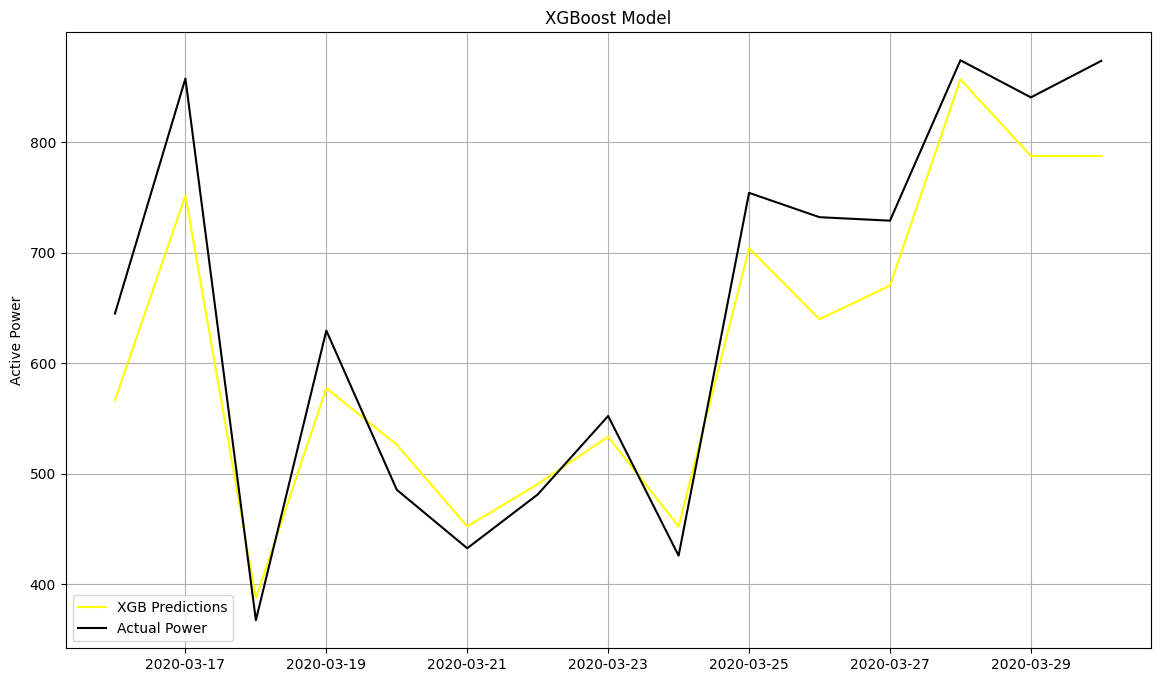

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(df_xgb.index, df_xgb['PredictedPower'], color='yellow', label='XGB Predictions')
plt.plot(df_xgb.index, df_xgb['ActualPower'], color='black', label='Actual Power')
plt.ylabel('Active Power')
plt.legend()
plt.grid()
plt.title("XGBoost Model")
plt.show()

## Comparison

### Combine Predictions from All Models

In [ ]:
df_combined = pd.DataFrame({
    'ActualPower': y_test_rf.values.flatten(),
    'LSTM_Predictions': df_lstm['PredictedPower'].values,
    'RF_Predictions': df_rf['PredictedPower'].values,
    'SVR_Predictions': df_svr['PredictedPower'].values,
    'SARIMA_Predictions': df_sarima['PredictedPower'].values,
    'XGBoost_Predictions': df_xgb['PredictedPower'].values
}, index=y_test_rf.index)

### Plotting All Predictions Together

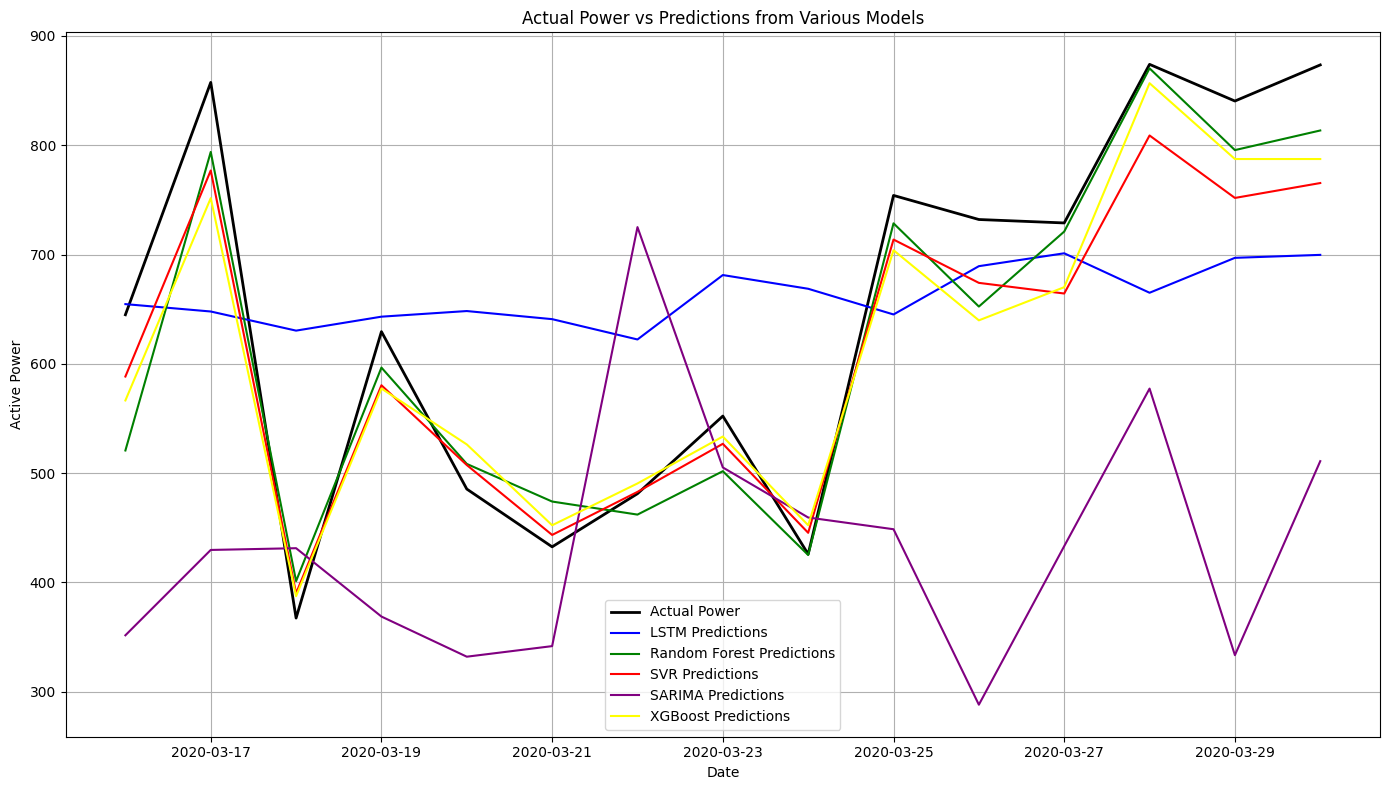

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(df_combined.index, df_combined['ActualPower'], color='black', linewidth=2, label='Actual Power')
plt.plot(df_combined.index, df_combined['LSTM_Predictions'], color='blue', label='LSTM Predictions')
plt.plot(df_combined.index, df_combined['RF_Predictions'], color='green', label='Random Forest Predictions')
plt.plot(df_combined.index, df_combined['SVR_Predictions'], color='red', label='SVR Predictions')
plt.plot(df_combined.index, df_combined['SARIMA_Predictions'], color='purple', label='SARIMA Predictions')
plt.plot(df_combined.index, df_combined['XGBoost_Predictions'], color='yellow', label='XGBoost Predictions')

plt.title('Actual Power vs Predictions from Various Models')
plt.xlabel('Date')
plt.ylabel('Active Power')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Prepare Evaluation Metrics for Plotting

In [ ]:
metrics = ['R-squared', 'MAE', 'RMSE', 'MAPE']
lstm_metrics = [r2_lstm, mae_lstm, rmse_lstm, mape_lstm]
rf_metrics = [r2_rf, mae_rf, rmse_rf, mape_rf]
svr_metrics = [r2_svr, mae_svr, rmse_svr, mape_svr]
sarima_metrics = [sarima_r2, sarima_mae, sarima_rmse, sarima_mape]
xgb_metrics = [xgb_r2, xgb_mae, xgb_rmse, xgb_mape]

In [ ]:
metrics_df = pd.DataFrame({
    'Metric': metrics,
    'LSTM': lstm_metrics,
    'Random Forest': rf_metrics,
    'SVR': svr_metrics,
    'SARIMA': sarima_metrics,
    'XGBoost': xgb_metrics
})

print(metrics_df)

      Metric        LSTM  Random Forest        SVR      SARIMA    XGBoost
0  R-squared    0.130408       0.911337   0.894189   -1.892932   0.890823
1        MAE  139.059398      40.727223  47.540755  255.057512  48.611933
2       RMSE  160.788439      51.341482  56.087140  293.268925  56.972266
3       MAPE    0.250756       0.064463   0.067481    0.367591   0.072151


In [ ]:
metrics_df_melted = metrics_df.melt(id_vars='Metric', var_name='Model', value_name='Value')

### Plot Evaluation Metrics

In [ ]:
sns.set(style="whitegrid")

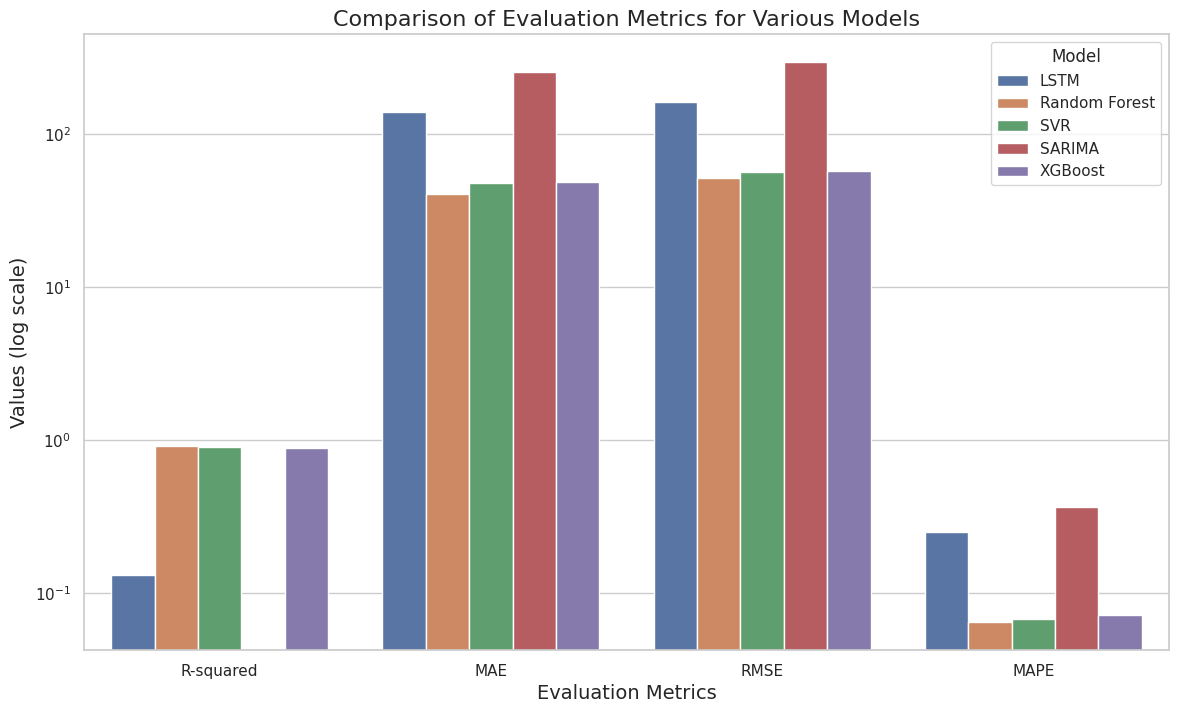

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_df_melted)

plt.title('Comparison of Evaluation Metrics for Various Models', fontsize=16)
plt.xlabel('Evaluation Metrics', fontsize=14)
plt.ylabel('Values (log scale)', fontsize=14)
plt.yscale('log')
plt.legend(title='Model')

plt.show()